In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from tqdm import tqdm
import pandas as pd
import pickle as pkl
import dtreeviz
import imodelsx.process_results
from sklearn.tree import plot_tree
import sys
import numpy as np
import imodelsx
import sklearn.tree
sys.path.append('../experiments/')
results_dir = '/home/jxm3/research/prompting/tree-prompt/results/tree-prompt/jun22-rt'

r = imodelsx.process_results.get_results_df(results_dir, use_cached=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 823.38it/s]


In [2]:
# select a single model
rd = r
# rd = rd[rd.num_prompts == 7]
run_args = rd.iloc[0]
model_name = run_args.model_name

### Load an individual model

acc 0.6360225140712945 depth 3 dset rotten_tomatoes
> Tree(max_depth=3 split_strategy=iprompt)
> ------------------------------------------------------
PromptStump(val=0.50 n=8530 prompt=

Does the review primarily focus on the positive aspects of the movie?)
   PromptStump(val=0.30 n=1524 prompt=

Does the review mention a positive aspect of the movie?)
      PromptStump(val=0.28 n=1285 prompt=

Does the review express a predominantly positive opinion about the movie?)
         Neg n=1029 val=0.265
         Pos n=256 val=0.359
      PromptStump(val=0.36 n=239 prompt=

Does the review contain a positive opinion about the movie?)
         Neg n=55 val=0.200
         Pos n=184 val=0.413
   PromptStump(val=0.54 n=7006 prompt=

Does the movie review focus on the theme of intolerance and its impact on families?)
      PromptStump(val=0.28 n=881 prompt=

Does the review mention positive aspects of the acting or performances?)
         Neg n=784 val=0.260
         Pos n=97 val=0.423
      Pro

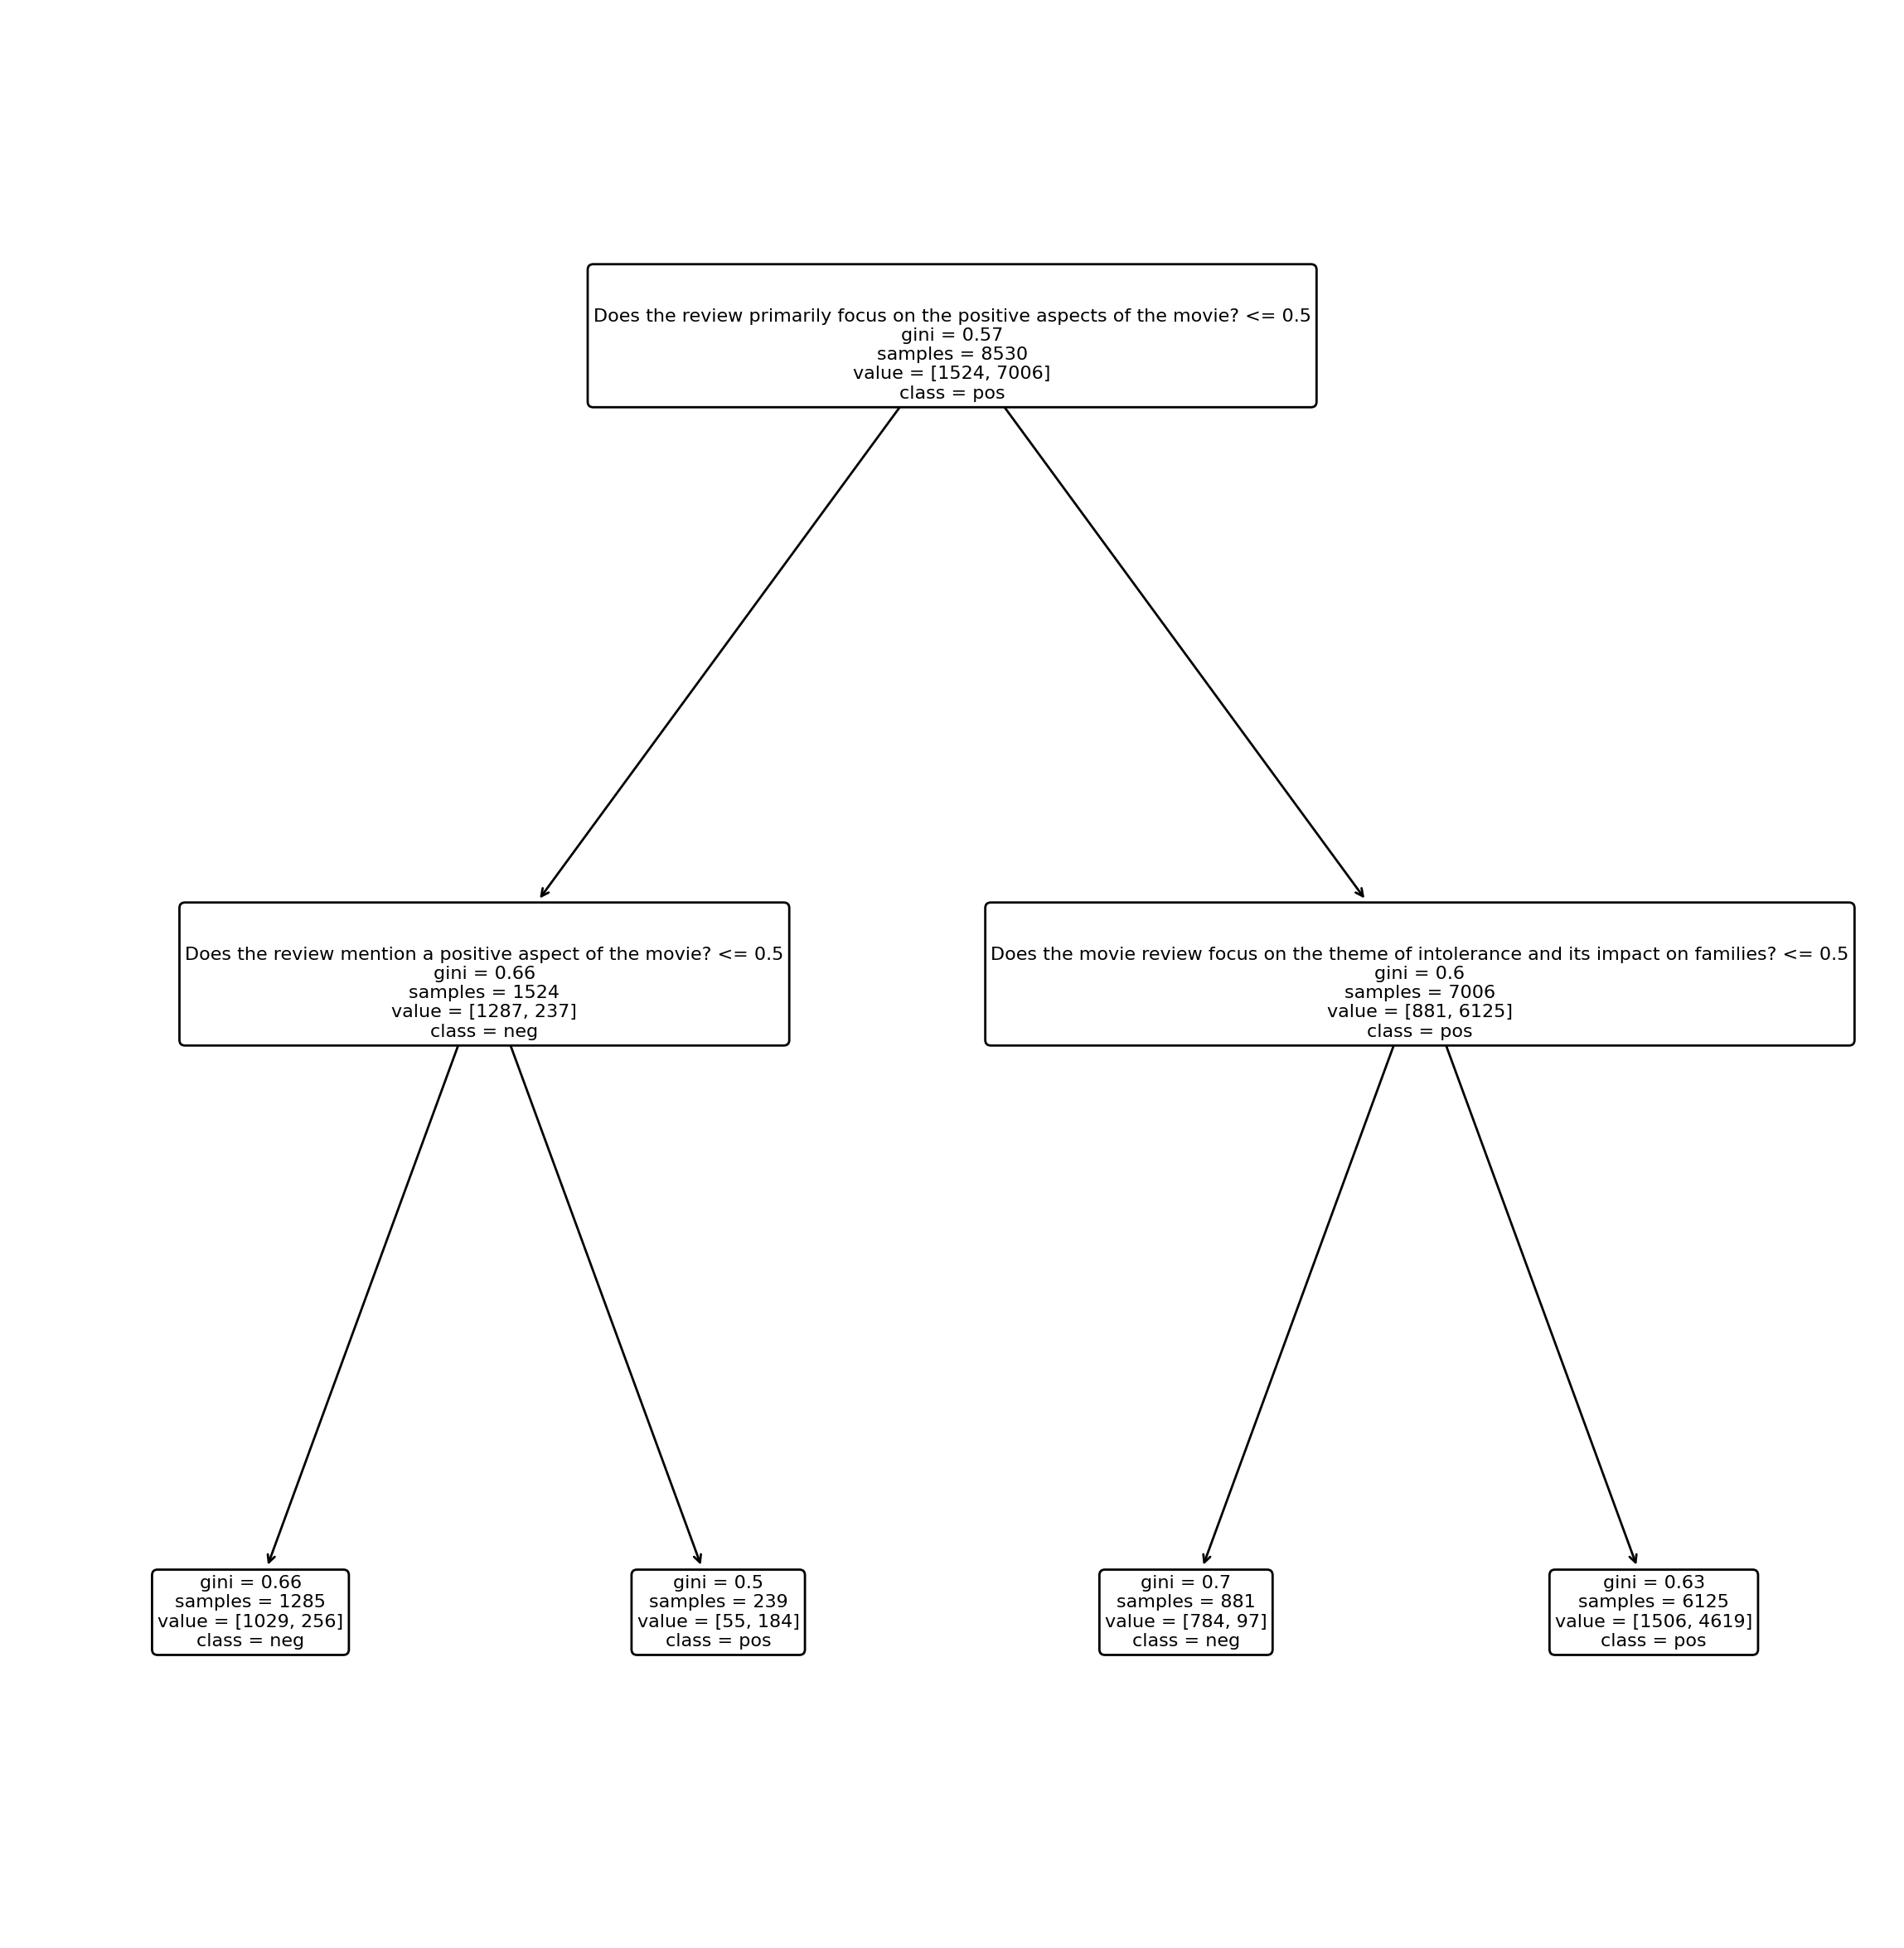

In [6]:
import matplotlib.pyplot as plt
import imodelsx.viz

print('acc', run_args.accuracy_test, 'depth', run_args.max_depth, 'dset', run_args.dataset_name)
model = pkl.load(open(join(run_args.save_dir_unique, 'model.pkl'), 'rb'))

if model_name == 'tprompt':
    dt, feature_names = imodelsx.viz.extract_sklearn_tree_from_llm_tree(model, n_classes=2, dtreeviz_dummies=False)
    print(model)
    print(feature_names)
else:
    dt = model
    feature_names = run_args.feature_names
feat_names = ['\n'.join(n.split(',')) for n in feature_names]

plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(dt, feature_names=feat_names, class_names=['neg', 'pos'],
                        precision=2, rounded=True, fontsize=8)
plt.show()